# Loan Prediction
This notebook is a documentation of the process of predicting the loan taken up for the bank customers. It includes the data transformation and data exploration process.
<br/>

The prediction model can be found in the loan prediction modelling file.
<br>
### Table of Content
1. Import Libraries and Datasets
2. Features Selection
3. Building Logistic Regression Model
4. Predictions and Evaluations
5. Further improvements

## 1. Import Libraries and Datasets

In [104]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandasql as ps
from datetime import date

# Data exploration
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [47]:
final = pd.read_csv("final.csv")

## 2. Features Selection
The final file after data wrangling and transformation includes many features. Some of which are not required to be inputs in our prediction model. To ensure that we only have the features that we need, we will have to identify them and remove the unnecessary features.

In [49]:
order = ['bank_balance_at_loan2','avg_trans_amt','no_trans','average_salary','no_of_inhabitants',
        'unemployment_rate','no_of_entrepreneurs','no_of_crime','loan_taken']
pred_model = final[order]

The feature unemployment rate has '?' values and is in str type. This will cause an error when building a prediction model. There is no unemployment rate available for district '69' and we will replace the '?' values with the average unemployment rate in Czech. We will also convert the data type from str to float.

In [82]:
pred_model['unemployment_rate']= pred_model['unemployment_rate'].replace('?','')
unemployment_mean = pred_model['unemployment_rate'].mean()
pred_model['unemployment_rate'].fillna(unemployment_mean)
pred_model['unemployment_rate'] = pred_model['unemployment_rate'].apply(float)

In [93]:
pred_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bank_balance_at_loan2  4500 non-null   float64
 1   avg_trans_amt          4500 non-null   float64
 2   no_trans               4500 non-null   float64
 3   average_salary         4500 non-null   int64  
 4   no_of_inhabitants      4500 non-null   int64  
 5   unemployment_rate      4500 non-null   float64
 6   no_of_entrepreneurs    4500 non-null   int64  
 7   no_of_crime            4500 non-null   int64  
 8   loan_taken             4500 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 316.5 KB


## 3. Building Logistic Regression Model

We will have import the sklearn library and split our data into training set and testing set.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = pred_model[['bank_balance_at_loan2','avg_trans_amt','no_trans','average_salary','no_of_inhabitants',
        'unemployment_rate','no_of_entrepreneurs','no_of_crime']]
y = pred_model['loan_taken']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## 4. Predictions and Evaluations
We will now input our training model into our test dataset. We will use a classification report to acccess the accuracy of our prediction model.

In [88]:
predictions = logmodel.predict(X_test)

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1251
           1       0.69      0.46      0.55       234

    accuracy                           0.88      1485
   macro avg       0.80      0.71      0.74      1485
weighted avg       0.87      0.88      0.87      1485



The model has an accuracy of 88% which shows the effectiveness of the model in predicting loan taken up for existing customers. Next we can use a graph to show which features are crucial in predicting loan taken up. 

In [116]:
importance = logmodel.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.00001
Feature: 1, Score: 0.00027
Feature: 2, Score: -0.02351
Feature: 3, Score: -0.00004
Feature: 4, Score: 0.00000
Feature: 5, Score: -0.00002
Feature: 6, Score: -0.00009
Feature: 7, Score: -0.00004


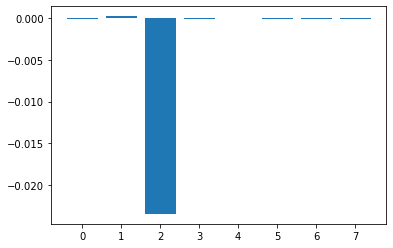

In [117]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

From the graph, we can see that feature 1 and 2 are the top 2 most important features to predict loan taken up. The two features are average transaction amount and the number of transactions made. These features are only available when the customers have taken up a bank account and transacted with us. More features about the individual customers would be required to build a prediction model to assess likelihood of loan taken up for new customers.
</br>

The model can be used on existing customer database to identify which customers we should focus our marketing campaigns on.

## 5. Further Improvements
Further enhancements can be made to improve the accuracy of the model. We can perform average standard rescaling on the numeric features and introduce gender and district into the model. If we were to introduce gender and district into the model, we have to perform one-hot encoding before we can input these features into the model.